In [91]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [92]:
'''
BASIC LEVEL
'''

'\nBASIC LEVEL\n'

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = r'https://raw.githubusercontent.com/ga-students/DS-DC-16/master/lessons/lesson-03/assets/dataset/imdb_1000.csv?token=AG8aPqiXfZxeP1RkZnc5DIZqDP1IPc83ks5YImHXwA%3D%3D'
movies = pd.read_csv(imdb_1000_data_url)

In [95]:
# check the number of rows and columns
movies.shape

(979, 6)

In [96]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [97]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [98]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration').head(1)
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


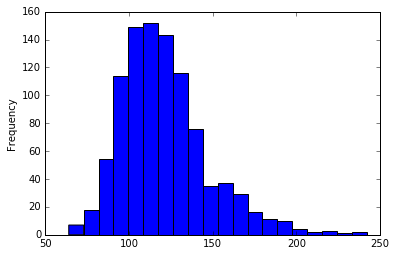

In [99]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind='hist', bins=20)

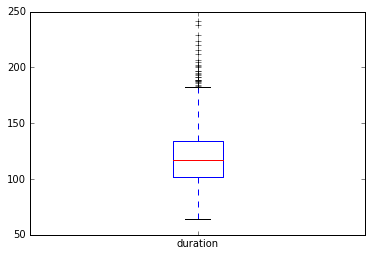

In [100]:
# use a box plot to display that same data
movies.duration.plot(kind='box')

In [101]:
'''
INTERMEDIATE LEVEL
'''

'\nINTERMEDIATE LEVEL\n'

In [102]:
# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

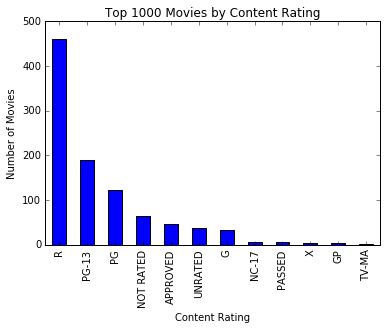

In [103]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='bar', title='Top 1000 Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [104]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [105]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [106]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [107]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)

In [108]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
movies[movies.duration >= 120].star_rating.mean()
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

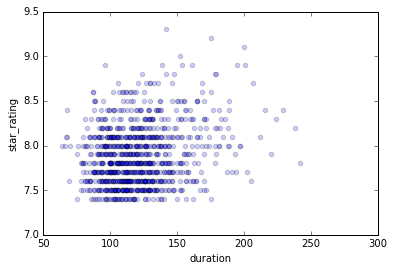

In [109]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2)

In [110]:
# calculate the average duration for each genre
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [111]:
'''
ADVANCED LEVEL
'''

'\nADVANCED LEVEL\n'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000005A2CA4518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000005A2E1B668>]], dtype=object)

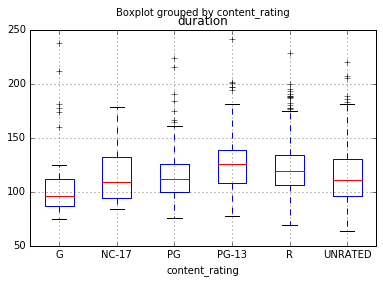

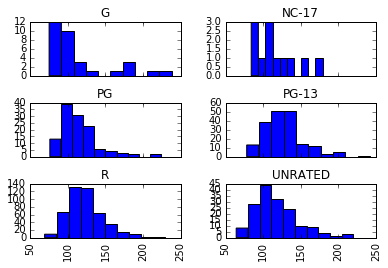

In [112]:
# visualize the relationship between content rating and duration
movies.boxplot(column='duration', by='content_rating')
movies.hist(column='duration', by='content_rating', sharex=True)

In [113]:
# determine the top rated movie (by star rating) for each genre
movies.sort('star_rating', ascending=False).groupby('genre').title.first()
movies.groupby('genre').title.first()   # equivalent, since DataFrame is already sorted by star rating

C:\Users\alsherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [114]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupe_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [115]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies

In [116]:
# option 1: manually create a list of relevant genres, then filter using that list
movies.genre.value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [117]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [118]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [119]:
# option 4: aggregate by count and mean, then filter using the count
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


In [120]:
'''
BONUS
'''

'\nBONUS\n'

In [121]:
# Figure out something "interesting" using the actors data!
